# DATA: 

The Guardian firearms murders and ownership data. The relevans sheet is uploaded in the github repository as a csv file. Download it from there. Note: this dataset is from 2012.

**Extra credit**: download directly from google docs with a google API

https://docs.google.com/spreadsheets/d/1chqUZHuY6cXYrRYkuE0uwXisGaYvr7durZHJhpLGycs/edit#gid=0

Number of mass shootings: find the link here https://datawrapper.dwcdn.net/pvLFI/4/

The world population by country find the download link here :
https://data.worldbank.org/indicator/SP.POP.TOTL

Remember that all read or downloads have to me reproducible.

Merge all datasets. After throwing away the irrelevant data it should look something like this (I renamed the GDP and the population as gdp" and "pop")

Throughout, when I ask you to include errors in plots or models, use Poisson statistics: the error is the square root of the number you are considering (e.g. this country has N fire arms +/- square root of N, or this country has Np [= N/population +/- (square root of N) / population] fire arms per person).

In [55]:
import numpy as np
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns

%matplotlib inline

In [56]:
df_gdp = pd.read_csv('data/gdp.csv')
df_pop = pd.read_csv('data/pop.csv')
df_data = pd.read_csv('data/data-pvLFI.csv')
df_firearms = pd.read_csv('data/World firearms murders and ownership - Sheet 1.csv')

In [57]:
df_gdp.head()

,Country,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,Unnamed: 61
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.791961e+09,2.498933e+09,2.467704e+09,2.584464e+09,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,1.019053e+10,1.248694e+10,1.593680e+10,1.793024e+10,2.053654e+10,2.004633e+10,2.005019e+10,1.970299e+10,1.946902e+10,NaN
2,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,8.417803e+10,7.549238e+10,8.247091e+10,1.041159e+11,1.153984e+11,1.249121e+11,1.267769e+11,1.029622e+11,8.963316e+10,NaN
3,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.288135e+10,1.204421e+10,1.192695e+10,1.289087e+10,1.231978e+10,1.278103e+10,1.321986e+10,1.139037e+10,1.192689e+10,NaN
4,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,4.001201e+09,3.650083e+09,3.346517e+09,3.427023e+09,3.146152e+09,3.248925e+09,NaN,NaN,NaN,NaN


In [58]:
df_pop.head()

,Country,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,Unnamed: 61
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,NaN
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,...,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,NaN
2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,...,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,NaN
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,NaN
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,NaN


In [59]:
df_data.head()

,Country,Guns/100 inhabitants,Number of mass shootings
0,Australia,15.0,4
1,Austria,30.4,1
2,Beligium,17.2,2
3,Canada,30.8,4
4,Denmark,12.0,0


In [60]:
df_firearms.head()

,Country/Territory,ISO code,Source,% of homicides by firearm,Number of homicides by firearm,"Homicide by firearm rate per 100,000 pop",Rank by rate of ownership,Average firearms per 100 people,Average total all civilian firearms
0,Albania,AL,CTS,65.9,56.0,1.76,70.0,8.6,270000.0
1,Algeria,DZ,CTS,4.8,20.0,0.06,78.0,7.6,1900000.0
2,Angola,AO,NaN,NaN,NaN,NaN,34.0,17.3,2800000.0
3,Anguilla,AI,WHO-MDB,24.0,1.0,7.14,NaN,NaN,NaN
4,Argentina,AR,Ministry of Justice,52.0,1198.0,3.02,62.0,10.2,3950000.0


In [61]:
df_gdp = df_gdp[['Country', '2012']]
df_pop = df_pop[['Country', '2012']]

In [62]:
df_gdp = df_gdp.rename(columns = {'2012': 'gdp'})
df_pop = df_pop.rename(columns = {'2012': 'pop'})

In [63]:
merge1 = df_gdp.merge(df_pop, left_on='Country', right_on='Country', how='inner')
merge2 = merge1.merge(df_data, left_on='Country', right_on='Country', how='inner')

In [64]:
df = merge2.merge(df_firearms, left_on='Country', right_on='Country/Territory', how='inner')

In [65]:
df.head()

,Country,gdp,pop,Guns/100 inhabitants,Number of mass shootings,Country/Territory,ISO code,Source,% of homicides by firearm,Number of homicides by firearm,"Homicide by firearm rate per 100,000 pop",Rank by rate of ownership,Average firearms per 100 people,Average total all civilian firearms
0,Australia,1.538194e+12,22728254.0,15.0,4,Australia,AU,NSO,11.5,30.0,0.14,42.0,15.0,3050000.0
1,Austria,4.074516e+11,8429991.0,30.4,1,Austria,AT,CTS,29.5,18.0,0.22,14.0,30.4,2500000.0
2,Canada,1.824289e+12,34750545.0,30.8,4,Canada,CA,CTS,32.0,173.0,0.51,13.0,30.8,9950000.0
3,Switzerland,6.650541e+11,7996861.0,45.7,2,Switzerland,CH,CTS,72.2,57.0,0.77,3.0,45.7,3400000.0
4,Germany,3.543984e+12,80425823.0,30.3,7,Germany,DE,CTS/National police,26.3,158.0,0.19,15.0,30.3,25000000.0


# exploration

## plot mass shooting vs gdp in absolute numbers, and per person. Show the errorbars (y errors)

Use Poisson statistics for the errorbars on the number of mass shootings (optional: include errors on the population, also as Poisson statistics)

Are there any points that look like they may be outilers?


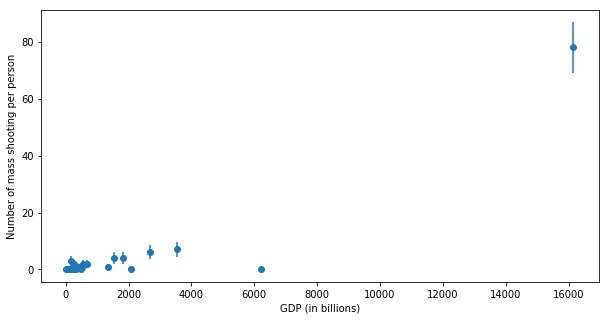

In [66]:
fig = plt.figure(figsize=(10,5)) 

scatter = plt.scatter(df.gdp / 1e9, df['Number of mass shootings'])
plt.errorbar(df.gdp / 1e9, df['Number of mass shootings'], 
            yerr = np.sqrt(df['Number of mass shootings'] * 1.0), fmt = '.')
plt.xlabel("GDP (in billions)")
plt.ylabel("Number of mass shooting per person")
plt.ylim()
plt.show()

## plot the average number of civilian fire arms per person
first without errors, then with errors. are there  points that look like outliers?

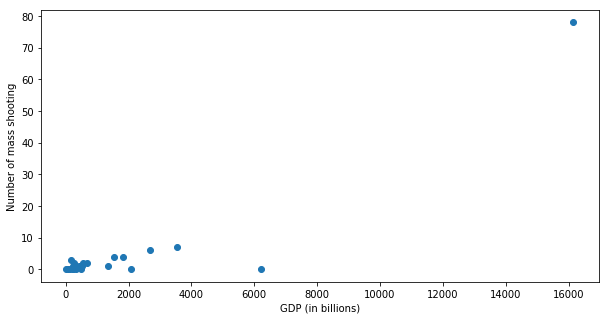

In [67]:
fig = plt.figure(figsize=(10,5)) 

scatter = plt.scatter(df.gdp / 1e9, df['Number of mass shootings'])
plt.errorbar(df.gdp / 1e9, df['Number of mass shootings'], fmt = '.')
plt.xlabel("GDP (in billions)")
plt.ylabel("Number of mass shooting")

## plot the average number of homicide by fire arms per person
first as a histogram

then against the country GDP, with statistical errors. are there  points that look like outliers?

(array([ 5.,  5.,  2.,  7.,  0.,  2.,  0.,  0.,  0.,  1.]),
 array([ 0.006 ,  0.0942,  0.1824,  0.2706,  0.3588,  0.447 ,  0.5352,
         0.6234,  0.7116,  0.7998,  0.888 ]),
 <a list of 10 Patch objects>)

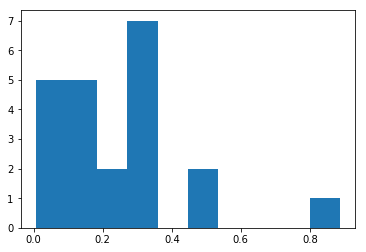

In [68]:
plt.hist(df['Average firearms per 100 people'] * 1e-2)

In [69]:
df['shootingspp'] = df["Number of mass shootings"] / df['pop'] * 1e3


# Avg Number of Homicide by Firearms per person

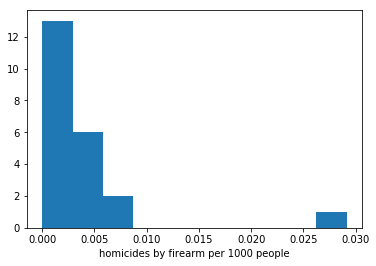

In [70]:
plt.hist(df['Number of homicides by firearm'] / df['pop'] * 1000)
plt.xlabel('homicides by firearm per 1000 people');

 # Avg Number of homicides by Firearmper person against GDP

(-0.1586071730528813, 0.21686225086014604)

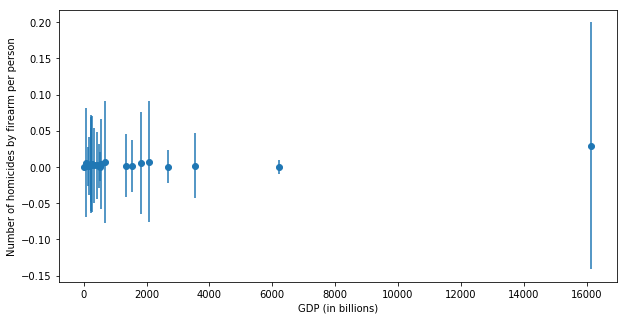

In [71]:
fig = plt.figure(figsize=(10,5)) 

scatter = plt.scatter(df.gdp / 1e9, df['Number of homicides by firearm'] / df['pop'] * 1000)
plt.errorbar(df.gdp / 1e9, df['Number of homicides by firearm'] / df['pop'] * 1000, 
            yerr = np.sqrt(df['Number of homicides by firearm'] /df['pop'] * 1000.0), fmt = '.')
plt.xlabel("GDP (in billions)")
plt.ylabel("Number of homicides by firearm per person")
plt.ylim()

(-0.013597657298382474, 0.04272519620201487)

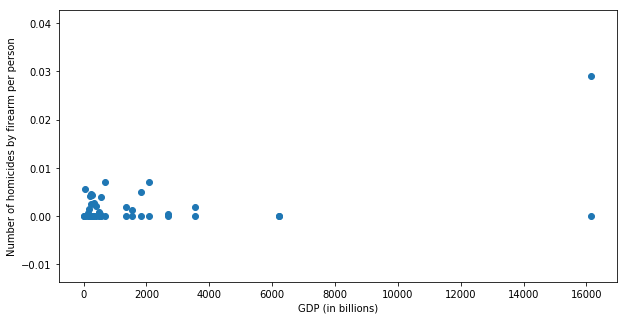

In [72]:
fig = plt.figure(figsize=(10,5)) 

scatter = plt.scatter(df.gdp / 1e9, df['Number of homicides by firearm'] / df['pop'] * 1000)
plt.errorbar(df.gdp / 1e9, df['Number of homicides by firearm'] / (df['pop'] * 1000), fmt = 'o')
plt.xlabel("GDP (in billions)")
plt.ylabel("Number of homicides by firearm per person")
plt.ylim()

## plot the number of  homicides by fire arm against the number of civilian firearms. plot the  US in a different color
with and without errorbars


(-462.09332549037566, 9703.717009690823)

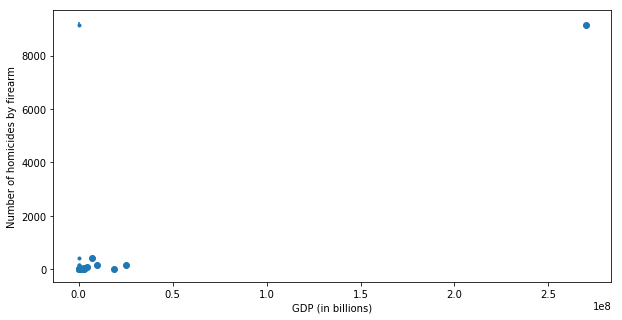

In [73]:
fig = plt.figure(figsize=(10,5)) 

scatter = plt.scatter(df['Average total all civilian firearms']
                      , df['Number of homicides by firearm'] )
plt.errorbar(df.gdp / 1e9, df['Number of homicides by firearm'], 
            yerr = np.sqrt(df['Number of homicides by firearm']), fmt = '.')
plt.xlabel("GDP (in billions)")
plt.ylabel("Number of homicides by firearm")
plt.ylim()

## plot the number of  mass shootings against the number of civilian firearms. plot the  US in a different color
with and without errorbars


(-4.3531774472899025, 91.173900786023921)

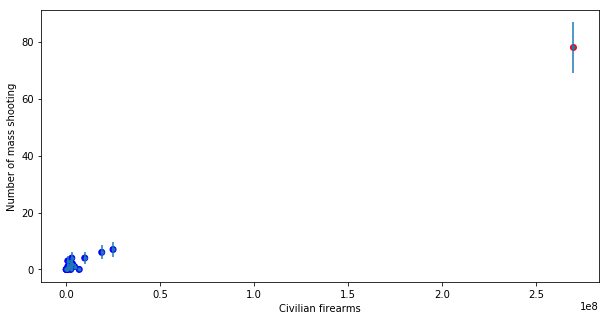

In [74]:
fig = plt.figure(figsize=(10,5)) 
colors = ['b'] * (df.shape[0] - 1)
colors.append('r')
scatter = plt.scatter(df['Average total all civilian firearms'], df['Number of mass shootings'], c = colors)
plt.errorbar(df['Average total all civilian firearms'], df['Number of mass shootings'], 
            yerr = np.sqrt(df['Number of mass shootings'] * 1.0), fmt = '.')
plt.xlabel("Civilian firearms")
plt.ylabel("Number of mass shooting")
plt.ylim()

(-3.9151766004415007, 81.915176600441498)

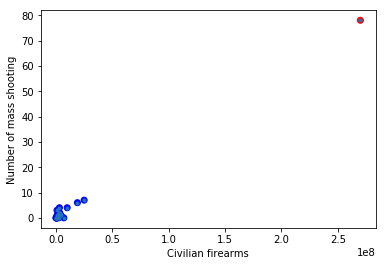

In [75]:
scatter = plt.scatter(df['Average total all civilian firearms'], df['Number of mass shootings'], c=colors)
plt.errorbar(df['Average total all civilian firearms'], df['Number of mass shootings'], fmt = '.')
plt.xlabel("Civilian firearms")
plt.ylabel("Number of mass shooting")
plt.ylim()

# Modeling

## fit a line to the Number of mass shootings  per person as a function of Average total all civilian firearms per person. 
Before you do it it is a good idea to make sure that both quantities are roughly of the same order of magnitude (unity). (You can simply divide by the order of magnitude of the mean of the sample to obtain this). Use

    - statsmodels OLS
    - statsmodels WLS
    - seaborn
    - choose one of
        -- creating a function that calculates the residuals and minimizing that function
        -- analytical solution http://mathworld.wolfram.com/LeastSquaresFitting.html
        -- numpy.polyfit() - https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.polyfit.html
    

WLS: that is the weighted square fit. The statsmodel package WLS function allows you to take the uncertainties of each data point into account when you fit your model. It takes the parameter weights, which is the inverse of your errors:
weights = 1.0/df.yerror
Notice that 
    a - sqrt(0) = 0
    b - 1/0 = infinity
    c - you cannot have weight that are infinity in your fit. Please come up with a solution and justify it.


the latter three you can learn about in this example: https://github.com/fedhere/PUI2017_fb55/blob/master/Lab5_fb55/genderIncomeBias.ipynb
Since we did not discuss these, I will add some notes to the repo in the afternoon.

Use the seaborn python package built in regression function  to plot the regression confidence intervals. 

import seaborn  as sns
sns.regplot(x="x", y="y", data=df);




In [76]:
df['firearmspp'] = df['Average total all civilian firearms'] / (df['pop'])
df['shootingspp'] =(df['Number of mass shootings']/df['pop'] * 1e3)/(1e-4)

In [77]:
lm = smf.ols('shootingspp ~ firearmspp', df).fit()
lm2 = smf.WLS(endog=df['shootingspp'], exog=df['firearmspp'], weights=1/abs(lm.resid)).fit()

In [78]:
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:            shootingspp   R-squared:                       0.715
Model:                            WLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     52.61
Date:                Wed, 18 Oct 2017   Prob (F-statistic):           3.82e-07
Time:                        23:53:27   Log-Likelihood:                -25.428
No. Observations:                  22   AIC:                             52.86
Df Residuals:                      21   BIC:                             53.95
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
firearmspp     4.3506      0.600      7.253      0.000       3.103       5.598
==============================================================================
Omnibus:                        3.868   Durbin-Watson:                   1.642
Prob(Omnibus):                  0.145   Jarque-Bera (JB):                2.837
Skew:                           0.879   Prob(JB):                        0.242
Kurtosis:                       2.928   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

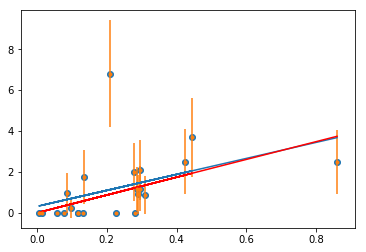

In [79]:
plt.scatter(df['firearmspp'] , df['shootingspp'], )
plt.plot(df['firearmspp'] , lm.predict() )
plt.errorbar(df['firearmspp'], df['shootingspp'], 
            yerr = np.sqrt(df['shootingspp'] * 1.0), fmt = '.')
plt.plot(df['firearmspp'] , lm2.predict() , c='r')

In [80]:
fit = np.polyfit(df['firearmspp'], df['shootingspp'], 1)

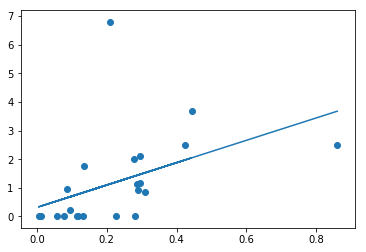

In [81]:
plt.plot(df['firearmspp'], fit[0]*df['firearmspp'] + fit[1])
plt.scatter(df['firearmspp'], df['shootingspp'])

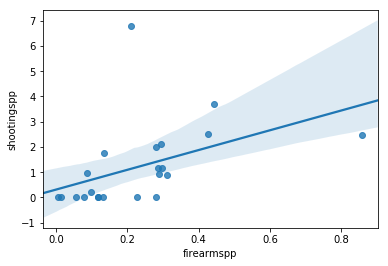

In [82]:
sns.regplot(x="firearmspp", y="shootingspp", data=df)

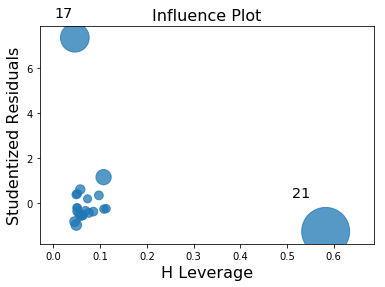

In [83]:
sm.graphics.influence_plot(lm, alpha  = 0.05, criterion="cooks");